### 【問題1】線形回帰のクラスを作成する
線形回帰のクラスを作成し、Sprint2で作成した回帰のパイプラインに組み込んでください。
以下が雛形です。ここにメソッドを加えていってください。メソッドやパラメータなどはscikit-learnを参考にしてください。
sklearn.linear_model.LinearRegression — scikit-learn 0.20.0 documentation
検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。

In [1]:
# import module
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
'''
Kaggle House Prices: "Advanced Regression Techniques"のデータを取り込み、重回帰分析のスクラッチを行う。

目的変数：'SalePrice' / '家の査定金額'
説明変数：'GrLivArea', 'YearBuilt' / 'リビングの大きさ'、'築年'

課題の目的：スクッチとクラスの構造に慣れる。

'''

# import file
df_train = pd.read_csv("train.csv")

house_X = df_train.loc[:, ['GrLivArea', 'YearBuilt']].values

house_y = df_train['SalePrice'].values
# house_y = house_y.rename(columns={0:'SalesPrice'})

 # split train data and test data
X_train, X_test, y_train, y_test = train_test_split(house_X, house_y, test_size=0.3, random_state=42)

# house_X.to_csv("linear_X.csv" )
# house_y.to_csv("linear_y.csv")

array([[1068, 1963],
       [2622, 1994],
       [1028, 1927],
       [1664, 1947],
       [1620, 2007],
       [ 630, 1972],
       [1954, 1939],
       [1456, 1978],
       [ 630, 1970],
       [1393, 1955],
       [1477, 1928],
       [ 874, 1968],
       [ 894, 1935],
       [1535, 2004],
       [1690, 2000],
       [1008, 1953],
       [1720, 2004],
       [1134, 1960],
       [1012, 1920],
       [1479, 2003],
       [1803, 1957],
       [1590, 2008],
       [1476, 2005],
       [ 936, 1956],
       [1431, 1999],
       [1199, 1993],
       [1340, 2007],
       [ 864, 1951],
       [1604, 1997],
       [1352, 2006],
       [1252, 1908],
       [2046, 2003],
       [3086, 1946],
       [ 952, 1956],
       [1636, 2006],
       [1136, 1965],
       [1904, 1950],
       [1928, 2003],
       [2520, 1993],
       [ 882, 1956],
       [1176, 1934],
       [2110, 1994],
       [ 950, 1971],
       [2042, 2008],
       [ 988, 1961],
       [2210, 1880],
       [ 912, 1964],
       [ 955,

In [3]:
# # split train data and test data
# X_train, X_test, y_train, y_test = train_test_split(house_X, house_y, test_size=0.3, random_state=42)

# data_len = len(X_train) 

# mu = X_train.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
# sigma = X_train.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

# # 標準化処理
# X_norm = (X_train -mu)/sigma

# data_len = len(X)
        
# mu = X.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
# sigma = X.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）
 
                
# # 3. パラメータをランダム値で初期化
# theta = np.random.rand(X.shape[1])

# # Xの０列目に「１」のベクトルを追加
# X_one =  np.hstack((np.ones((data_len, 1)), X_norm))
# print(X_one.shape)
# print(y_train.shape)
# print(theta.shape)
# error = 0.5*np.sum((y_train-(np.dot(X_one, theta)))**2)

# count = 0

# for _ in range(10):
#     theta_temp = theta - 0.001*np.dot(((np.dot(X, theta))-y_train), X)
#     theta = theta_temp

#     current_error = np.sum(((np.dot(X, theta)) - y_train) ** 2)
#     diff = error - current_error
#     error = current_error

#     count += 1
#     log = "{}回目、誤差：{}"
#     print(log.format(count, diff))



In [4]:
# fit
# # split train data and test data
# X_train, X_test, y_train, y_test = train_test_split(house_X, house_y, test_size=0.3, random_state=42)


# m = len(X_train)
# n = X_train.shape[1]

# mu = X_train.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
# sigma = X_train.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

# # 標準化処理
# X_train = (X_train -mu)/sigma

# # Xの０列目に「１」のベクトルを追加

# X_train = np.hstack((np.ones(m).reshape(m, 1),X_train))
# theta = np.random.rand(X_train.shape[1], 1)

# alpha = 0.1
# y_train = y_train.reshape(m, 1)
# hx = np.dot(X_train, theta)
# count = 0
# error = 0.5*np.sum(((np.dot(X_train, theta)-y_train))**2)

# for i in range(200):
#     theta = theta - alpha *  (1/m) * (np.dot(X_train.T, (hx-y_train)))
#     hx = np.dot(X_train, theta)
#     current_error = 0.5*np.sum(((np.dot(X_train, theta)) - y_train) ** 2)
#     diff = error - current_error
#     error = current_error
#     count += 1
#     log = "{}回目、誤差：{}"

#     print(log.format(count, diff))

    
# # predict

# print(hx)

# #     # trainデータのlossのリザルトを出す
# #     if self.verbose:
# #         self.loss[i] = self.MSE(hx, y)

# #     # X_val入力ある場合MSEのリザルトを出す
# #     if type(X_val) == np.ndarray:
# #         val_pred = self._linear_hypothesis(X_val)
# #         self.val_loss[i] = self.MSE(val_pred, y_val)

In [5]:
import numpy as np

class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter=500, lr=0.01, bias=True, verbose=True):
        # ハイパーパラメータを属性として記録
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.n = 0
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.num_iter)
        self.use_loss = np.zeros(self.num_iter)        
        self.val_loss = np.zeros(self.num_iter)
        

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        m = len(X)
        # 基本統計量
        mu = X.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
        sigma = X.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

        # 標準化処理
        X = (X - mu)/sigma
        
        # バイアス項の挿入
        if self.bias:
            X = np.hstack((np.ones(m).reshape(m, 1),X))
        # 特徴量の数取得
        self.n = X.shape[1]
            
        # X_vaにもバイアスの追加
        if type(X_val)==np.ndarray:
            m_val = len(X_val)
             # 基本統計量
            mu_val = X_val.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
            sigma_val = X_val.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

            # 標準化処理
            X_val = (X_val - mu_val)/sigma_val
            
            # バイアス項の挿入
            X_val = np.hstack((np.ones(m_val).reshape(m_val, 1), X_val))
        
        # シータの初期化
        self._init_theta()
        
        # 最急降下法
        if type(X_val)==np.ndarray:
            self._gradient_descent(X_val, y_val)
            self.val_loss = self.loss
        
        # シータの初期化
        self._init_theta()
        
        self._gradient_descent(X, y)
        self.use_loss = self.loss
        
    def _init_theta(self):
        """
        self.coef_: 次の形のndarray, shape(n_features)
        パラメータをランダムに初期化します。
        """
        self.coef_ = np.random.rand(self.n, 1)
        
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        """
        
        hx = np.dot(X, self.coef_)
        return hx
    

    def _gradient_descent(self, X, y):
        """
        Parameters
         ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        alpha = self.lr
        m = len(X)
        y = y.reshape(m, 1)
        hx = self._linear_hypothesis(X)
        count = 0

        for i in range(self.num_iter):
            self.coef_ = self.coef_ - alpha *  (1/m) * (np.dot(X.T, (hx-y)))
            hx = self._linear_hypothesis(X)
            
            if self.verbose:
                log = 'COUNT:{}, MSE:{}'
                #verboseをTrueにした際は学習過程を出力
                print(log.format(count+1, self.MSE(hx, y)))

            # trainデータのlossのリザルトを出す
            if self.verbose:
                self.loss[i] = self._compute_cost(X, y)

#             # X_val入力ある場合MSEのリザルトを出す
#             if type(X_val) == np.ndarray:
#                 val_pred = self._linear_hypothesis(X_val)
#                 self.val_loss[i] = self._compute_cost(val_pred, y_val)
                
                
            count += 1
    

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        
        # 標準化処理
        mu = X.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
        sigma = X.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

        # 標準化処理
        X = (X -mu)/sigma
        
        if self.bias:
            m = len(X)
            X = np.hstack((np.ones(m).reshape(m,1), X))
        hx = np.dot(X, self.coef_)
        
        return hx
            
    def MSE(self, y_pred, y):
        """
        平均二乗誤差の計算

        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値

        Returns
        ----------
        mse : numpy.float
          平均二乗誤差
        """
        # リシェイプ
        y = y.reshape(len(y), 1)
        m = len(y)
        mse = (0.5*(1/m)*np.sum(((y_pred - y) ** 2)))
        
        return mse
        
    def _compute_cost(self, X, y):
        """
        平均二乗誤差を計算する。MSEは共通の関数を作っておき呼び出す

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ
        y : 次の形のndarray, shape (n_samples, 1)
          正解値
        Returns
        -------
          次の形のndarray, shape (1,)
          平均二乗誤差
        """
        J = self.MSE(self._linear_hypothesis(X), y)
        
        return J

In [6]:
slr= ScratchLinearRegression(num_iter=5000, lr=0.001)

slr.fit(X_train, y_train, X_test, y_test)

COUNT:1, MSE:19651743425.662598
COUNT:2, MSE:19613328275.527836
COUNT:3, MSE:19574993344.35559
COUNT:4, MSE:19536738462.810997
COUNT:5, MSE:19498563461.921085
COUNT:6, MSE:19460468173.073982
COUNT:7, MSE:19422452428.018154
COUNT:8, MSE:19384516058.861603
COUNT:9, MSE:19346658898.07111
COUNT:10, MSE:19308880778.471428
COUNT:11, MSE:19271181533.244526
COUNT:12, MSE:19233560995.92883
COUNT:13, MSE:19196019000.418404
COUNT:14, MSE:19158555380.96224
COUNT:15, MSE:19121169972.163425
COUNT:16, MSE:19083862608.97843
COUNT:17, MSE:19046633126.71631
COUNT:18, MSE:19009481361.03796
COUNT:19, MSE:18972407147.955338
COUNT:20, MSE:18935410323.8307
COUNT:21, MSE:18898490725.375877
COUNT:22, MSE:18861648189.651478
COUNT:23, MSE:18824882554.066143
COUNT:24, MSE:18788193656.37581
COUNT:25, MSE:18751581334.682934
COUNT:26, MSE:18715045427.435772
COUNT:27, MSE:18678585773.427593
COUNT:28, MSE:18642202211.79596
COUNT:29, MSE:18605894582.021984
COUNT:30, MSE:18569662723.929546
COUNT:31, MSE:18533506477.6846

COUNT:772, MSE:4885309280.218638
COUNT:773, MSE:4877544546.35551
COUNT:774, MSE:4869795780.908635
COUNT:775, MSE:4862062950.765882
COUNT:776, MSE:4854346022.884436
COUNT:777, MSE:4846644964.2906685
COUNT:778, MSE:4838959742.079978
COUNT:779, MSE:4831290323.416645
COUNT:780, MSE:4823636675.533698
COUNT:781, MSE:4815998765.732752
COUNT:782, MSE:4808376561.383877
COUNT:783, MSE:4800770029.925438
COUNT:784, MSE:4793179138.863969
COUNT:785, MSE:4785603855.7740135
COUNT:786, MSE:4778044148.297988
COUNT:787, MSE:4770499984.146036
COUNT:788, MSE:4762971331.095885
COUNT:789, MSE:4755458156.9927025
COUNT:790, MSE:4747960429.748958
COUNT:791, MSE:4740478117.344272
COUNT:792, MSE:4733011187.825283
COUNT:793, MSE:4725559609.3055
COUNT:794, MSE:4718123349.965161
COUNT:795, MSE:4710702378.051098
COUNT:796, MSE:4703296661.876584
COUNT:797, MSE:4695906169.821208
COUNT:798, MSE:4688530870.330719
COUNT:799, MSE:4681170731.916899
COUNT:800, MSE:4673825723.157414
COUNT:801, MSE:4666495812.695684
COUNT:802,

COUNT:1530, MSE:1896643893.029936
COUNT:1531, MSE:1894997929.4922884
COUNT:1532, MSE:1893355312.8823836
COUNT:1533, MSE:1891716036.3511903
COUNT:1534, MSE:1890080093.0637949
COUNT:1535, MSE:1888447476.199373
COUNT:1536, MSE:1886818178.9511595
COUNT:1537, MSE:1885192194.526421
COUNT:1538, MSE:1883569516.1464255
COUNT:1539, MSE:1881950137.0464106
COUNT:1540, MSE:1880334050.4755595
COUNT:1541, MSE:1878721249.6969693
COUNT:1542, MSE:1877111727.9876223
COUNT:1543, MSE:1875505478.6383574
COUNT:1544, MSE:1873902494.9538412
COUNT:1545, MSE:1872302770.2525377
COUNT:1546, MSE:1870706297.866683
COUNT:1547, MSE:1869113071.1422536
COUNT:1548, MSE:1867523083.4389396
COUNT:1549, MSE:1865936328.130115
COUNT:1550, MSE:1864352798.6028109
COUNT:1551, MSE:1862772488.2576854
COUNT:1552, MSE:1861195390.5089962
COUNT:1553, MSE:1859621498.7845728
COUNT:1554, MSE:1858050806.5257857
COUNT:1555, MSE:1856483307.1875222
COUNT:1556, MSE:1854918994.2381537
COUNT:1557, MSE:1853357861.159514
COUNT:1558, MSE:1851799901

COUNT:2459, MSE:1207936551.8167834
COUNT:2460, MSE:1207685550.6614175
COUNT:2461, MSE:1207435054.5474215
COUNT:2462, MSE:1207185062.4535038
COUNT:2463, MSE:1206935573.3604493
COUNT:2464, MSE:1206686586.2511153
COUNT:2465, MSE:1206438100.1104267
COUNT:2466, MSE:1206190113.9253714
COUNT:2467, MSE:1205942626.6849985
COUNT:2468, MSE:1205695637.3804114
COUNT:2469, MSE:1205449145.004764
COUNT:2470, MSE:1205203148.5532577
COUNT:2471, MSE:1204957647.0231366
COUNT:2472, MSE:1204712639.4136825
COUNT:2473, MSE:1204468124.726213
COUNT:2474, MSE:1204224101.9640741
COUNT:2475, MSE:1203980570.1326394
COUNT:2476, MSE:1203737528.2393034
COUNT:2477, MSE:1203494975.293478
COUNT:2478, MSE:1203252910.3065903
COUNT:2479, MSE:1203011332.292075
COUNT:2480, MSE:1202770240.2653732
COUNT:2481, MSE:1202529633.243927
COUNT:2482, MSE:1202289510.2471764
COUNT:2483, MSE:1202049870.2965522
COUNT:2484, MSE:1201810712.415477
COUNT:2485, MSE:1201572035.6293573
COUNT:2486, MSE:1201333838.9655802
COUNT:2487, MSE:1201096121

COUNT:3291, MSE:1106395464.5875628
COUNT:3292, MSE:1106348165.5039456
COUNT:3293, MSE:1106300960.8272607
COUNT:3294, MSE:1106253850.3681731
COUNT:3295, MSE:1106206833.9377282
COUNT:3296, MSE:1106159911.347353
COUNT:3297, MSE:1106113082.408854
COUNT:3298, MSE:1106066346.934417
COUNT:3299, MSE:1106019704.736606
COUNT:3300, MSE:1105973155.628363
COUNT:3301, MSE:1105926699.4230063
COUNT:3302, MSE:1105880335.9342308
COUNT:3303, MSE:1105834064.9761066
COUNT:3304, MSE:1105787886.3630786
COUNT:3305, MSE:1105741799.9099648
COUNT:3306, MSE:1105695805.431957
COUNT:3307, MSE:1105649902.744619
COUNT:3308, MSE:1105604091.663886
COUNT:3309, MSE:1105558372.0060644
COUNT:3310, MSE:1105512743.58783
COUNT:3311, MSE:1105467206.226229
COUNT:3312, MSE:1105421759.738675
COUNT:3313, MSE:1105376403.94295
COUNT:3314, MSE:1105331138.6572027
COUNT:3315, MSE:1105285963.699949
COUNT:3316, MSE:1105240878.8900692
COUNT:3317, MSE:1105195884.046809
COUNT:3318, MSE:1105150978.9897785
COUNT:3319, MSE:1105106163.5389502
C

COUNT:3948, MSE:1089058377.1008894
COUNT:3949, MSE:1089045594.8919797
COUNT:3950, MSE:1089032838.0292573
COUNT:3951, MSE:1089020106.462195
COUNT:3952, MSE:1089007400.1403677
COUNT:3953, MSE:1088994719.0134513
COUNT:3954, MSE:1088982063.0312212
COUNT:3955, MSE:1088969432.1435542
COUNT:3956, MSE:1088956826.300428
COUNT:3957, MSE:1088944245.4519196
COUNT:3958, MSE:1088931689.5482063
COUNT:3959, MSE:1088919158.5395653
COUNT:3960, MSE:1088906652.3763735
COUNT:3961, MSE:1088894171.0091066
COUNT:3962, MSE:1088881714.38834
COUNT:3963, MSE:1088869282.4647474
COUNT:3964, MSE:1088856875.189103
COUNT:3965, MSE:1088844492.5122771
COUNT:3966, MSE:1088832134.38524
COUNT:3967, MSE:1088819800.7590601
COUNT:3968, MSE:1088807491.5849037
COUNT:3969, MSE:1088795206.8140335
COUNT:3970, MSE:1088782946.3978124
COUNT:3971, MSE:1088770710.2876983
COUNT:3972, MSE:1088758498.4352477
COUNT:3973, MSE:1088746310.7921133
COUNT:3974, MSE:1088734147.3100455
COUNT:3975, MSE:1088722007.9408903
COUNT:3976, MSE:1088709892.

COUNT:4601, MSE:1084370779.059562
COUNT:4602, MSE:1084367265.458453
COUNT:4603, MSE:1084363758.772111
COUNT:4604, MSE:1084360258.9868395
COUNT:4605, MSE:1084356766.0889692
COUNT:4606, MSE:1084353280.064858
COUNT:4607, MSE:1084349800.9008906
COUNT:4608, MSE:1084346328.5834796
COUNT:4609, MSE:1084342863.0990634
COUNT:4610, MSE:1084339404.4341087
COUNT:4611, MSE:1084335952.5751085
COUNT:4612, MSE:1084332507.508583
COUNT:4613, MSE:1084329069.2210789
COUNT:4614, MSE:1084325637.6991699
COUNT:4615, MSE:1084322212.929456
COUNT:4616, MSE:1084318794.8985646
COUNT:4617, MSE:1084315383.5931492
COUNT:4618, MSE:1084311978.9998906
COUNT:4619, MSE:1084308581.105495
COUNT:4620, MSE:1084305189.8966954
COUNT:4621, MSE:1084301805.360252
COUNT:4622, MSE:1084298427.4829504
COUNT:4623, MSE:1084295056.2516036
COUNT:4624, MSE:1084291691.6530495
COUNT:4625, MSE:1084288333.6741529
COUNT:4626, MSE:1084284982.3018048
COUNT:4627, MSE:1084281637.5229225
COUNT:4628, MSE:1084278299.324449
COUNT:4629, MSE:1084274967.69

COUNT:136, MSE:15011975076.855446
COUNT:137, MSE:14983706986.895428
COUNT:138, MSE:14955496407.86673
COUNT:139, MSE:14927343222.458399
COUNT:140, MSE:14899247313.599474
COUNT:141, MSE:14871208564.45849
COUNT:142, MSE:14843226858.442966
COUNT:143, MSE:14815302079.198946
COUNT:144, MSE:14787434110.610487
COUNT:145, MSE:14759622836.799177
COUNT:146, MSE:14731868142.12365
COUNT:147, MSE:14704169911.179098
COUNT:148, MSE:14676528028.796785
COUNT:149, MSE:14648942380.043564
COUNT:150, MSE:14621412850.221386
COUNT:151, MSE:14593939324.86683
COUNT:152, MSE:14566521689.750618
COUNT:153, MSE:14539159830.877125
COUNT:154, MSE:14511853634.483906
COUNT:155, MSE:14484602987.041227
COUNT:156, MSE:14457407775.251568
COUNT:157, MSE:14430267886.049166
COUNT:158, MSE:14403183206.599524
COUNT:159, MSE:14376153624.298944
COUNT:160, MSE:14349179026.774055
COUNT:161, MSE:14322259301.881334
COUNT:162, MSE:14295394337.70664
COUNT:163, MSE:14268584022.56474
COUNT:164, MSE:14241828244.998844
COUNT:165, MSE:14215

COUNT:630, MSE:6195245295.929383
COUNT:631, MSE:6184895684.086672
COUNT:632, MSE:6174567076.014904
COUNT:633, MSE:6164259428.988881
COUNT:634, MSE:6153972700.3705435
COUNT:635, MSE:6143706847.608779
COUNT:636, MSE:6133461828.239269
COUNT:637, MSE:6123237599.88429
COUNT:638, MSE:6113034120.252539
COUNT:639, MSE:6102851347.138968
COUNT:640, MSE:6092689238.424603
COUNT:641, MSE:6082547752.076357
COUNT:642, MSE:6072426846.146869
COUNT:643, MSE:6062326478.774323
COUNT:644, MSE:6052246608.182273
COUNT:645, MSE:6042187192.679463
COUNT:646, MSE:6032148190.659665
COUNT:647, MSE:6022129560.601494
COUNT:648, MSE:6012131261.068238
COUNT:649, MSE:6002153250.70769
COUNT:650, MSE:5992195488.251969
COUNT:651, MSE:5982257932.517344
COUNT:652, MSE:5972340542.4040785
COUNT:653, MSE:5962443276.896232
COUNT:654, MSE:5952566095.061518
COUNT:655, MSE:5942708956.051108
COUNT:656, MSE:5932871819.099481
COUNT:657, MSE:5923054643.524238
COUNT:658, MSE:5913257388.725939
COUNT:659, MSE:5903480014.187934
COUNT:660,

COUNT:1199, MSE:2699443604.042867
COUNT:1200, MSE:2696181001.4137826
COUNT:1201, MSE:2692925003.261749
COUNT:1202, MSE:2689675596.1899605
COUNT:1203, MSE:2686432766.828849
COUNT:1204, MSE:2683196501.8360248
COUNT:1205, MSE:2679966787.8962255
COUNT:1206, MSE:2676743611.72126
COUNT:1207, MSE:2673526960.0499506
COUNT:1208, MSE:2670316819.6480813
COUNT:1209, MSE:2667113177.3083396
COUNT:1210, MSE:2663916019.850263
COUNT:1211, MSE:2660725334.120188
COUNT:1212, MSE:2657541106.9911885
COUNT:1213, MSE:2654363325.363026
COUNT:1214, MSE:2651191976.162095
COUNT:1215, MSE:2648027046.341367
COUNT:1216, MSE:2644868522.8803368
COUNT:1217, MSE:2641716392.784969
COUNT:1218, MSE:2638570643.087644
COUNT:1219, MSE:2635431260.847105
COUNT:1220, MSE:2632298233.1484027
COUNT:1221, MSE:2629171547.102841
COUNT:1222, MSE:2626051189.8479266
COUNT:1223, MSE:2622937148.5473113
COUNT:1224, MSE:2619829410.3907447
COUNT:1225, MSE:2616727962.5940137
COUNT:1226, MSE:2613632792.3988967
COUNT:1227, MSE:2610543887.0731053

COUNT:1985, MSE:1414825641.1821132
COUNT:1986, MSE:1414160489.806377
COUNT:1987, MSE:1413496680.8859987
COUNT:1988, MSE:1412834211.7069118
COUNT:1989, MSE:1412173079.560545
COUNT:1990, MSE:1411513281.7438138
COUNT:1991, MSE:1410854815.5591092
COUNT:1992, MSE:1410197678.3142862
COUNT:1993, MSE:1409541867.3226538
COUNT:1994, MSE:1408887379.9029605
COUNT:1995, MSE:1408234213.3793874
COUNT:1996, MSE:1407582365.081535
COUNT:1997, MSE:1406931832.344414
COUNT:1998, MSE:1406282612.5084307
COUNT:1999, MSE:1405634702.9193797
COUNT:2000, MSE:1404988100.928431
COUNT:2001, MSE:1404342803.8921208
COUNT:2002, MSE:1403698809.1723378
COUNT:2003, MSE:1403056114.1363149
COUNT:2004, MSE:1402414716.156618
COUNT:2005, MSE:1401774612.6111333
COUNT:2006, MSE:1401135800.8830593
COUNT:2007, MSE:1400498278.360893
COUNT:2008, MSE:1399862042.4384227
COUNT:2009, MSE:1399227090.5147138
COUNT:2010, MSE:1398593419.9940994
COUNT:2011, MSE:1397961028.2861712
COUNT:2012, MSE:1397329912.8057659
COUNT:2013, MSE:1396700070.

COUNT:2769, MSE:1152762314.2960405
COUNT:2770, MSE:1152625569.8399246
COUNT:2771, MSE:1152489100.6864147
COUNT:2772, MSE:1152352906.2804568
COUNT:2773, MSE:1152216986.0681171
COUNT:2774, MSE:1152081339.4965801
COUNT:2775, MSE:1151945966.0141482
COUNT:2776, MSE:1151810865.0702362
COUNT:2777, MSE:1151676036.115372
COUNT:2778, MSE:1151541478.6011922
COUNT:2779, MSE:1151407191.9804409
COUNT:2780, MSE:1151273175.706967
COUNT:2781, MSE:1151139429.235723
COUNT:2782, MSE:1151005952.0227613
COUNT:2783, MSE:1150872743.5252337
COUNT:2784, MSE:1150739803.2013867
COUNT:2785, MSE:1150607130.510562
COUNT:2786, MSE:1150474724.9131925
COUNT:2787, MSE:1150342585.8708
COUNT:2788, MSE:1150210712.845995
COUNT:2789, MSE:1150079105.302472
COUNT:2790, MSE:1149947762.705009
COUNT:2791, MSE:1149816684.5194647
COUNT:2792, MSE:1149685870.2127762
COUNT:2793, MSE:1149555319.2529566
COUNT:2794, MSE:1149425031.1090934
COUNT:2795, MSE:1149295005.2513473
COUNT:2796, MSE:1149165241.1509469
COUNT:2797, MSE:1149035738.280

COUNT:3360, MSE:1105471114.1315043
COUNT:3361, MSE:1105429515.9592528
COUNT:3362, MSE:1105388001.3998458
COUNT:3363, MSE:1105346570.2850058
COUNT:3364, MSE:1105305222.4467928
COUNT:3365, MSE:1105263957.7176075
COUNT:3366, MSE:1105222775.9301872
COUNT:3367, MSE:1105181676.917606
COUNT:3368, MSE:1105140660.5132751
COUNT:3369, MSE:1105099726.5509417
COUNT:3370, MSE:1105058874.8646867
COUNT:3371, MSE:1105018105.288927
COUNT:3372, MSE:1104977417.6584117
COUNT:3373, MSE:1104936811.8082242
COUNT:3374, MSE:1104896287.5737796
COUNT:3375, MSE:1104855844.7908244
COUNT:3376, MSE:1104815483.2954373
COUNT:3377, MSE:1104775202.9240265
COUNT:3378, MSE:1104735003.5133297
COUNT:3379, MSE:1104694884.9004138
COUNT:3380, MSE:1104654846.9226744
COUNT:3381, MSE:1104614889.4178345
COUNT:3382, MSE:1104575012.2239444
COUNT:3383, MSE:1104535215.1793804
COUNT:3384, MSE:1104495498.1228447
COUNT:3385, MSE:1104455860.8933647
COUNT:3386, MSE:1104416303.330292
COUNT:3387, MSE:1104376825.2733018
COUNT:3388, MSE:1104337

COUNT:3860, MSE:1092341298.1739702
COUNT:3861, MSE:1092326077.3157315
COUNT:3862, MSE:1092310887.0139287
COUNT:3863, MSE:1092295727.207147
COUNT:3864, MSE:1092280597.8340936
COUNT:3865, MSE:1092265498.8336012
COUNT:3866, MSE:1092250430.144625
COUNT:3867, MSE:1092235391.7062416
COUNT:3868, MSE:1092220383.4576526
COUNT:3869, MSE:1092205405.33818
COUNT:3870, MSE:1092190457.2872686
COUNT:3871, MSE:1092175539.2444856
COUNT:3872, MSE:1092160651.1495183
COUNT:3873, MSE:1092145792.9421773
COUNT:3874, MSE:1092130964.562393
COUNT:3875, MSE:1092116165.950217
COUNT:3876, MSE:1092101397.0458217
COUNT:3877, MSE:1092086657.7894998
COUNT:3878, MSE:1092071948.1216638
COUNT:3879, MSE:1092057267.9828475
COUNT:3880, MSE:1092042617.313702
COUNT:3881, MSE:1092027996.055
COUNT:3882, MSE:1092013404.1476321
COUNT:3883, MSE:1091998841.5326085
COUNT:3884, MSE:1091984308.1510577
COUNT:3885, MSE:1091969803.9442275
COUNT:3886, MSE:1091955328.8534822
COUNT:3887, MSE:1091940882.820306
COUNT:3888, MSE:1091926465.7863


COUNT:4367, MSE:1087495853.6940672
COUNT:4368, MSE:1087490355.5225058
COUNT:4369, MSE:1087484868.3760238
COUNT:4370, MSE:1087479392.2324882
COUNT:4371, MSE:1087473927.0698128
COUNT:4372, MSE:1087468472.865954
COUNT:4373, MSE:1087463029.5989127
COUNT:4374, MSE:1087457597.2467353
COUNT:4375, MSE:1087452175.7875109
COUNT:4376, MSE:1087446765.199373
COUNT:4377, MSE:1087441365.4604995
COUNT:4378, MSE:1087435976.5491118
COUNT:4379, MSE:1087430598.443475
COUNT:4380, MSE:1087425231.121898
COUNT:4381, MSE:1087419874.5627334
COUNT:4382, MSE:1087414528.7443771
COUNT:4383, MSE:1087409193.6452687
COUNT:4384, MSE:1087403869.2438908
COUNT:4385, MSE:1087398555.5187693
COUNT:4386, MSE:1087393252.4484735
COUNT:4387, MSE:1087387960.0116153
COUNT:4388, MSE:1087382678.18685
COUNT:4389, MSE:1087377406.952876
COUNT:4390, MSE:1087372146.2884345
COUNT:4391, MSE:1087366896.1723077
COUNT:4392, MSE:1087361656.5833235
COUNT:4393, MSE:1087356427.50035
COUNT:4394, MSE:1087351208.902298
COUNT:4395, MSE:1087346000.768

COUNT:4866, MSE:1085760767.6110544
COUNT:4867, MSE:1085758747.1228924
COUNT:4868, MSE:1085756730.6819656
COUNT:4869, MSE:1085754718.2801588
COUNT:4870, MSE:1085752709.9093723
COUNT:4871, MSE:1085750705.5615234
COUNT:4872, MSE:1085748705.2285457
COUNT:4873, MSE:1085746708.902389
COUNT:4874, MSE:1085744716.5750184
COUNT:4875, MSE:1085742728.2384164
COUNT:4876, MSE:1085740743.8845804
COUNT:4877, MSE:1085738763.5055249
COUNT:4878, MSE:1085736787.0932796
COUNT:4879, MSE:1085734814.6398907
COUNT:4880, MSE:1085732846.1374202
COUNT:4881, MSE:1085730881.5779462
COUNT:4882, MSE:1085728920.9535625
COUNT:4883, MSE:1085726964.2563787
COUNT:4884, MSE:1085725011.4785204
COUNT:4885, MSE:1085723062.6121287
COUNT:4886, MSE:1085721117.6493614
COUNT:4887, MSE:1085719176.582391
COUNT:4888, MSE:1085717239.4034057
COUNT:4889, MSE:1085715306.1046107
COUNT:4890, MSE:1085713376.6782253
COUNT:4891, MSE:1085711451.116485
COUNT:4892, MSE:1085709529.4116411
COUNT:4893, MSE:1085707611.5559602
COUNT:4894, MSE:1085705

In [7]:
hx = slr.predict(X_test)

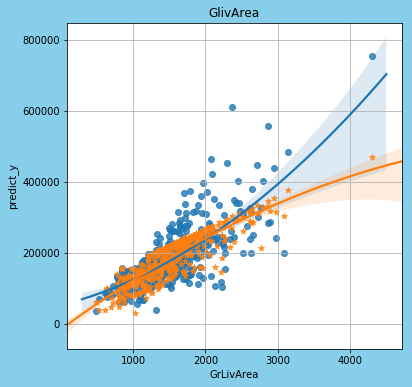

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

'''
predict data　と　test dataの散布図を各説明変数ごとに二次元にプロットする。

'''

predict_y = pd.DataFrame(hx)
test_X = pd.DataFrame(X_test)
test_y = pd.DataFrame(y_test)

plot_predict = pd.DataFrame(pd.concat([test_X, test_y, predict_y], axis=1).values)
plot_predict = plot_predict.rename(columns={0:'GrLivArea', 1:'YearBuilt', 2:'test_y', 3:'predict_y'})

# define Initial setting 
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)

plt.grid()

# plot a cross section of mt.Fuji
plt.title("GlivArea")
# plt.xlabel("GrLivArea")
# plt.ylabel("loss")

sns.regplot('GrLivArea', 'test_y', data=plot_predict, order=2, label='Test', marker='o')
sns.regplot('GrLivArea', 'predict_y', data=plot_predict, order=2, label='Predict', marker='*')

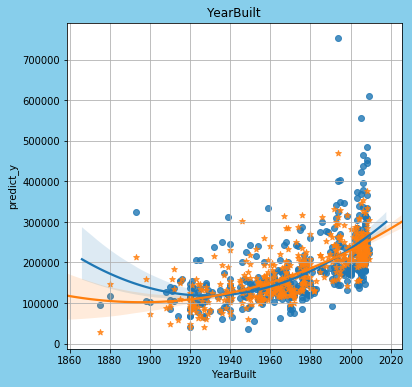

In [9]:
# define Initial setting 
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)

plt.grid()


# plot a cross section of mt.Fuji
plt.title("YearBuilt")
# plt.xlabel("YearBuilt")
# plt.ylabel("loss")


sns.regplot('YearBuilt', 'test_y', data=plot_predict, order=2, label='Test', marker='o')
sns.regplot('YearBuilt', 'predict_y', data=plot_predict, order=2, label='Predict', marker='*')

### 【問題2】学習曲線のプロット
まず、学習曲線を表示する関数を作成してください。
線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

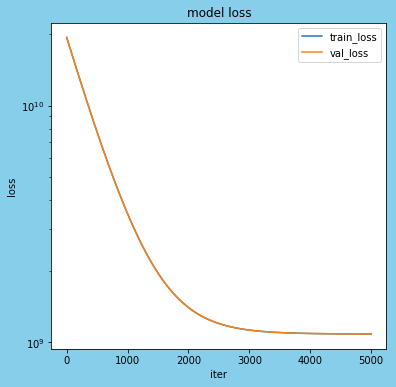

In [27]:
df_loss = pd.DataFrame(slr.use_loss)
# df_loss = df_loss - 1080000000
val_loss = pd.DataFrame(slr.val_loss)
# val_loss = val_loss - 1080000000

# define Initial setting 
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)
ax.set_yscale('log') 
plt.grid()


# plot a cross section of mt.Fuji
plt.title("model loss")
plt.xlabel("iter")
plt.ylabel("loss")

p1, = plt.plot(df_loss, label='o')
p2, = plt.plot(val_loss)
plt.legend([p1, p2],["train_loss", "val_loss"], loc=1) # 凡例の位置, 名前の指定

plt.grid()
plt.show()

### 【問題3】（アドバンス課題）バイアス項の除去
バイアス項 θ0 を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

バイアス項を除くと、特徴量がすべて平均以下の場合、目的変数がマイナスになってしまうため、適切なモデルがつくれず、誤差が小さくならない。

In [11]:
slr_bf = ScratchLinearRegression(num_iter=500, lr=0.01, bias=False, verbose=True)
slr_bf.fit(X_train, y_train)

COUNT:1, MSE:19402254484.539837
COUNT:2, MSE:19359144915.7053
COUNT:3, MSE:19317025914.777878
COUNT:4, MSE:19275874683.133026
COUNT:5, MSE:19235668947.500977
COUNT:6, MSE:19196386947.85033
COUNT:7, MSE:19158007425.55129
COUNT:8, MSE:19120509611.811966
COUNT:9, MSE:19083873216.381683
COUNT:10, MSE:19048078416.51485
COUNT:11, MSE:19013105846.18958
COUNT:12, MSE:18978936585.575096
COUNT:13, MSE:18945552150.742184
COUNT:14, MSE:18912934483.611073
COUNT:15, MSE:18881065942.131313
COUNT:16, MSE:18849929290.688217
COUNT:17, MSE:18819507690.730724
COUNT:18, MSE:18789784691.61546
COUNT:19, MSE:18760744221.66213
COUNT:20, MSE:18732370579.415276
COUNT:21, MSE:18704648425.10766
COUNT:22, MSE:18677562772.32062
COUNT:23, MSE:18651098979.836876
COUNT:24, MSE:18625242743.681286
COUNT:25, MSE:18599980089.34525
COUNT:26, MSE:18575297364.190567
COUNT:27, MSE:18551181230.02848
COUNT:28, MSE:18527618655.86999
COUNT:29, MSE:18504596910.843437
COUNT:30, MSE:18482103557.275433
COUNT:31, MSE:18460126443.931503

In [12]:
slr_bf.predict(X_test)

array([[-4.88844933e+04],
       [ 1.31470633e+05],
       [-9.24025258e+04],
       [-1.05133443e+04],
       [ 5.16109084e+04],
       [-8.01296751e+04],
       [ 7.92000364e+03],
       [ 4.16387179e+03],
       [-8.23383918e+04],
       [-2.71601540e+04],
       [-4.90794492e+04],
       [-6.16041969e+04],
       [-9.61674549e+04],
       [ 4.03054258e+04],
       [ 5.04623830e+04],
       [-6.55697760e+04],
       [ 5.77006660e+04],
       [-4.59916988e+04],
       [-1.01637487e+05],
       [ 3.39354812e+04],
       [ 1.36001762e+04],
       [ 4.98944169e+04],
       [ 3.58621129e+04],
       [-6.90267405e+04],
       [ 2.50046883e+04],
       [-3.43603316e+03],
       [ 2.52829772e+04],
       [-8.13185716e+04],
       [ 3.90628720e+04],
       [ 2.53069588e+04],
       [-9.23229888e+04],
       [ 8.72495419e+04],
       [ 1.22090577e+05],
       [-6.75222873e+04],
       [ 5.20110033e+04],
       [-4.02818506e+04],
       [ 1.53665288e+04],
       [ 7.61541995e+04],
       [ 1.2

### 問題4】（アドバンス課題）特徴量の多次元化
特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証してください。

多次元化を行うと、訓練データの誤差は小さくなるが、テストデータの誤差は大きくなる。

In [13]:
# 特徴量の二乗に関する検討
import numpy as np

class ScratchLinearRegressionSquared():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter=500, lr=0.01, bias=True, verbose=True):
        # ハイパーパラメータを属性として記録
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.n = 0
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.num_iter)
        self.use_loss = np.zeros(self.num_iter)        
        self.val_loss = np.zeros(self.num_iter)
        

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        X = X**2 # squared
        m = len(X)
        # 基本統計量
        mu = X.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
        sigma = X.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

        # 標準化処理
        X = (X - mu)/sigma
        
        # バイアス項の挿入
        if self.bias:
            X = np.hstack((np.ones(m).reshape(m, 1),X))
        # 特徴量の数取得
        self.n = X.shape[1]
            
        # X_vaにもバイアスの追加
        if type(X_val)==np.ndarray:
            m_val = len(X_val)
             # 基本統計量
            mu_val = X_val.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
            sigma_val = X_val.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

            # 標準化処理
            X_val = (X_val - mu_val)/sigma_val
            
            # バイアス項の挿入
            X_val = np.hstack((np.ones(m_val).reshape(m_val, 1), X_val))
        
        # シータの初期化
        self._init_theta()
        
        # 最急降下法
        if type(X_val)==np.ndarray:
            self._gradient_descent(X_val, y_val)
            self.val_loss = self.loss
        
        # シータの初期化
        self._init_theta()
        
        self._gradient_descent(X, y)
        self.use_loss = self.loss
        
    def _init_theta(self):
        """
        self.coef_: 次の形のndarray, shape(n_features)
        パラメータをランダムに初期化します。
        """
        self.coef_ = np.random.rand(self.n, 1)
        
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        """
        
        hx = np.dot(X, self.coef_)
        return hx
    

    def _gradient_descent(self, X, y):
        """
        Parameters
         ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        alpha = self.lr
        m = len(X)
        y = y.reshape(m, 1)
        hx = self._linear_hypothesis(X)
        count = 0

        for i in range(self.num_iter):
            self.coef_ = self.coef_ - alpha *  (1/m) * (np.dot(X.T, (hx-y)))
            hx = self._linear_hypothesis(X)
            
            if self.verbose:
                log = 'COUNT:{}, MSE:{}'
                #verboseをTrueにした際は学習過程を出力
                print(log.format(count+1, self.MSE(hx, y)))

            # trainデータのlossのリザルトを出す
            if self.verbose:
                self.loss[i] = self._compute_cost(X, y)

#             # X_val入力ある場合MSEのリザルトを出す
#             if type(X_val) == np.ndarray:
#                 val_pred = self._linear_hypothesis(X_val)
#                 self.val_loss[i] = self._compute_cost(val_pred, y_val)
                
                
            count += 1
    

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        
        X = X**2 # squared
        
        # 標準化処理
        mu = X.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
        sigma = X.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

        # 標準化処理
        X = (X -mu)/sigma
        
        if self.bias:
            m = len(X)
            X = np.hstack((np.ones(m).reshape(m,1), X))
        hx = np.dot(X, self.coef_)
        
        return hx
            
    def MSE(self, y_pred, y):
        """
        平均二乗誤差の計算

        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値

        Returns
        ----------
        mse : numpy.float
          平均二乗誤差
        """
        # リシェイプ
        y = y.reshape(len(y), 1)
        m = len(y)
        mse = (0.5*(1/m)*np.sum(((y_pred - y) ** 2)))
        
        return mse
        
    def _compute_cost(self, X, y):
        """
        平均二乗誤差を計算する。MSEは共通の関数を作っておき呼び出す

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ
        y : 次の形のndarray, shape (n_samples, 1)
          正解値
        Returns
        -------
          次の形のndarray, shape (1,)
          平均二乗誤差
        """
        J = self.MSE(self._linear_hypothesis(X), y)
        
        return J
        

In [14]:
slrs = ScratchLinearRegressionSquared()
slrs.fit(X_train, y_train, X_test, y_test)
hx_squared = slrs.predict(X_test)

COUNT:1, MSE:19307137901.703335
COUNT:2, MSE:18931954772.876358
COUNT:3, MSE:18564567012.993847
COUNT:4, MSE:18204810919.250607
COUNT:5, MSE:17852526268.684975
COUNT:6, MSE:17507556243.19076
COUNT:7, MSE:17169747356.169497
COUNT:8, MSE:16838949380.786556
COUNT:9, MSE:16515015279.79543
COUNT:10, MSE:16197801136.89543
COUNT:11, MSE:15887166089.588678
COUNT:12, MSE:15582972263.50321
COUNT:13, MSE:15285084708.149565
COUNT:14, MSE:14993371334.079168
COUNT:15, MSE:14707702851.413353
COUNT:16, MSE:14427952709.71272
COUNT:17, MSE:14153997039.157091
COUNT:18, MSE:13885714593.007057
COUNT:19, MSE:13622986691.318764
COUNT:20, MSE:13365697165.884186
COUNT:21, MSE:13113732306.369808
COUNT:22, MSE:12866980807.627209
COUNT:23, MSE:12625333718.149614
COUNT:24, MSE:12388684389.649158
COUNT:25, MSE:12156928427.73009
COUNT:26, MSE:11929963643.633656
COUNT:27, MSE:11707690007.031149
COUNT:28, MSE:11490009599.841867
COUNT:29, MSE:11276826571.053448
COUNT:30, MSE:11068047092.52248
COUNT:31, MSE:10863579315.

COUNT:74, MSE:5320874729.662396
COUNT:75, MSE:5239667165.560042
COUNT:76, MSE:5160092303.832377
COUNT:77, MSE:5082117282.126737
COUNT:78, MSE:5005709900.328645
COUNT:79, MSE:4930838607.198967
COUNT:80, MSE:4857472487.281072
COUNT:81, MSE:4785581248.072557
COUNT:82, MSE:4715135207.456183
COUNT:83, MSE:4646105281.384756
COUNT:84, MSE:4578462971.814841
COUNT:85, MSE:4512180354.884259
COUNT:86, MSE:4447230069.328436
COUNT:87, MSE:4383585305.130771
COUNT:88, MSE:4321219792.402283
COUNT:89, MSE:4260107790.4859185
COUNT:90, MSE:4200224077.2809443
COUNT:91, MSE:4141543938.7829947
COUNT:92, MSE:4084043158.8354044
COUNT:93, MSE:4027698009.087551
COUNT:94, MSE:3972485239.1560206
COUNT:95, MSE:3918382066.9844875
COUNT:96, MSE:3865366169.398314
COUNT:97, MSE:3813415672.8498836
COUNT:98, MSE:3762509144.3508596
COUNT:99, MSE:3712625582.5875635
COUNT:100, MSE:3663744409.2157693
COUNT:101, MSE:3615845460.3312874
COUNT:102, MSE:3568908978.1127872
COUNT:103, MSE:3522915602.633376
COUNT:104, MSE:347784636

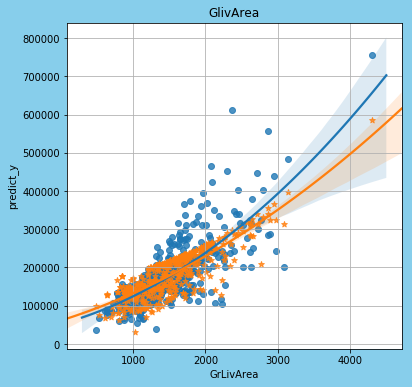

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

predict_y = pd.DataFrame(hx_squared)
test_X = pd.DataFrame(X_test)
test_y = pd.DataFrame(y_test)

plot_predict = pd.DataFrame(pd.concat([test_X, test_y, predict_y], axis=1).values)
plot_predict = plot_predict.rename(columns={0:'GrLivArea', 1:'YearBuilt', 2:'test_y', 3:'predict_y'})

# define Initial setting 
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)

plt.grid()

# plot a cross section of mt.Fuji
plt.title("GlivArea")
# plt.xlabel("GrLivArea")
# plt.ylabel("loss")

sns.regplot('GrLivArea', 'test_y', data=plot_predict, order=2, label='Test', marker='o')
sns.regplot('GrLivArea', 'predict_y', data=plot_predict, order=2, label='Predict', marker='*')

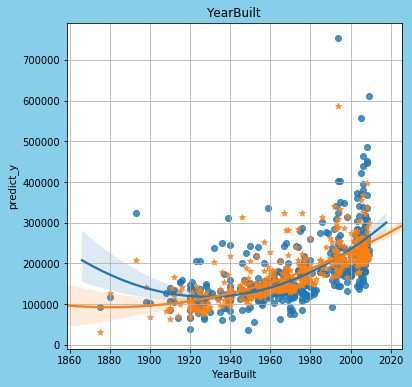

In [16]:
# define Initial setting 
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)

plt.grid()


# plot a cross section of mt.Fuji
plt.title("YearBuilt")
# plt.xlabel("YearBuilt")
# plt.ylabel("loss")


sns.regplot('YearBuilt', 'test_y', data=plot_predict, order=2, label='Test', marker='o')
sns.regplot('YearBuilt', 'predict_y', data=plot_predict, order=2, label='Predict', marker='*')

In [17]:
# 特徴量の三乗に関する検討
import numpy as np

class ScratchLinearRegressionCubed():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter=500, lr=0.01, bias=True, verbose=True):
        # ハイパーパラメータを属性として記録
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.n = 0
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.num_iter)
        self.use_loss = np.zeros(self.num_iter)        
        self.val_loss = np.zeros(self.num_iter)
        

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        X = X**3 # cubed
        m = len(X)
        # 基本統計量
        mu = X.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
        sigma = X.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

        # 標準化処理
        X = (X - mu)/sigma
        
        # バイアス項の挿入
        if self.bias:
            X = np.hstack((np.ones(m).reshape(m, 1),X))
        # 特徴量の数取得
        self.n = X.shape[1]
            
        # X_vaにもバイアスの追加
        if type(X_val)==np.ndarray:
            m_val = len(X_val)
             # 基本統計量
            mu_val = X_val.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
            sigma_val = X_val.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

            # 標準化処理
            X_val = (X_val - mu_val)/sigma_val
            
            # バイアス項の挿入
            X_val = np.hstack((np.ones(m_val).reshape(m_val, 1), X_val))
        
        # シータの初期化
        self._init_theta()
        
        # 最急降下法
        if type(X_val)==np.ndarray:
            self._gradient_descent(X_val, y_val)
            self.val_loss = self.loss
        
        # シータの初期化
        self._init_theta()
        
        self._gradient_descent(X, y)
        self.use_loss = self.loss
        
    def _init_theta(self):
        """
        self.coef_: 次の形のndarray, shape(n_features)
        パラメータをランダムに初期化します。
        """
        self.coef_ = np.random.rand(self.n, 1)
        
    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ

        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        """
        
        hx = np.dot(X, self.coef_)
        return hx
    

    def _gradient_descent(self, X, y):
        """
        Parameters
         ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        
        alpha = self.lr
        m = len(X)
        y = y.reshape(m, 1)
        hx = self._linear_hypothesis(X)
        count = 0

        for i in range(self.num_iter):
            self.coef_ = self.coef_ - alpha *  (1/m) * (np.dot(X.T, (hx-y)))
            hx = self._linear_hypothesis(X)
            
            if self.verbose:
                log = 'COUNT:{}, MSE:{}'
                #verboseをTrueにした際は学習過程を出力
                print(log.format(count+1, self.MSE(hx, y)))

            # trainデータのlossのリザルトを出す
            if self.verbose:
                self.loss[i] = self._compute_cost(X, y)

#             # X_val入力ある場合MSEのリザルトを出す
#             if type(X_val) == np.ndarray:
#                 val_pred = self._linear_hypothesis(X_val)
#                 self.val_loss[i] = self._compute_cost(val_pred, y_val)
                
                
            count += 1
    

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        
        X = X**3 # cubed
        
        # 標準化処理
        mu = X.mean(axis=0) # 平均の算出 （axis=0を指定して列毎に標準化）
        sigma = X.std(axis=0) # 標準偏差の算出 （axis=0を指定して列毎に標準化）

        # 標準化処理
        X = (X -mu)/sigma
        
        if self.bias:
            m = len(X)
            X = np.hstack((np.ones(m).reshape(m,1), X))
        hx = np.dot(X, self.coef_)
        
        return hx
            
    def MSE(self, y_pred, y):
        """
        平均二乗誤差の計算

        Parameters
        ----------
        y_pred : 次の形のndarray, shape (n_samples,)
          推定した値
        y : 次の形のndarray, shape (n_samples,)
          正解値

        Returns
        ----------
        mse : numpy.float
          平均二乗誤差
        """
        # リシェイプ
        y = y.reshape(len(y), 1)
        m = len(y)
        mse = (0.5*(1/m)*np.sum(((y_pred - y) ** 2)))
        
        return mse
        
    def _compute_cost(self, X, y):
        """
        平均二乗誤差を計算する。MSEは共通の関数を作っておき呼び出す

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          学習データ
        y : 次の形のndarray, shape (n_samples, 1)
          正解値
        Returns
        -------
          次の形のndarray, shape (1,)
          平均二乗誤差
        """
        J = self.MSE(self._linear_hypothesis(X), y)
        
        return J
        

In [18]:
slrc = ScratchLinearRegressionCubed()
slrc.fit(X_train, y_train, X_test, y_test)
hx_cubed = slrc.predict(X_test)

COUNT:1, MSE:19307072089.01518
COUNT:2, MSE:18931890281.717808
COUNT:3, MSE:18564503816.49178
COUNT:4, MSE:18204748991.08526
COUNT:5, MSE:17852465583.078392
COUNT:6, MSE:17507496774.895485
COUNT:7, MSE:17169689080.457539
COUNT:8, MSE:16838892273.438536
COUNT:9, MSE:16514959317.090006
COUNT:10, MSE:16197746295.5989
COUNT:11, MSE:15887112346.944857
COUNT:12, MSE:15582919597.223452
COUNT:13, MSE:15285033096.40306
COUNT:14, MSE:14993320755.483406
COUNT:15, MSE:14707653285.024803
COUNT:16, MSE:14427904135.017702
COUNT:17, MSE:14153949436.062838
COUNT:18, MSE:13885667941.832968
COUNT:19, MSE:13622940972.78784
COUNT:20, MSE:13365652361.114658
COUNT:21, MSE:13113688396.866922
COUNT:22, MSE:12866937775.275187
COUNT:23, MSE:12625291545.203798
COUNT:24, MSE:12388643058.728312
COUNT:25, MSE:12156887921.808851
COUNT:26, MSE:11929923946.035173
COUNT:27, MSE:11707651101.419846
COUNT:28, MSE:11489971470.216377
COUNT:29, MSE:11276789201.739683
COUNT:30, MSE:11068010468.166862
COUNT:31, MSE:10863543421.

COUNT:113, MSE:3479205160.2844825
COUNT:114, MSE:3442974823.887567
COUNT:115, MSE:3407469305.0424337
COUNT:116, MSE:3372674097.561507
COUNT:117, MSE:3338574985.697661
COUNT:118, MSE:3305158038.326524
COUNT:119, MSE:3272409603.2453523
COUNT:120, MSE:3240316301.5861645
COUNT:121, MSE:3208865022.340831
COUNT:122, MSE:3178042916.995874
COUNT:123, MSE:3147837394.2747893
COUNT:124, MSE:3118236114.9857183
COUNT:125, MSE:3089226986.97237
COUNT:126, MSE:3060798160.1661234
COUNT:127, MSE:3032938021.7372694
COUNT:128, MSE:3005635191.34342
COUNT:129, MSE:2978878516.473126
COUNT:130, MSE:2952657067.8827963
COUNT:131, MSE:2926960135.125059
COUNT:132, MSE:2901777222.1667137
COUNT:133, MSE:2877098043.0944886
COUNT:134, MSE:2852912517.906843
COUNT:135, MSE:2829210768.3900933
COUNT:136, MSE:2805983114.077156
COUNT:137, MSE:2783220068.287275
COUNT:138, MSE:2760912334.2450876
COUNT:139, MSE:2739050801.2774534
COUNT:140, MSE:2717626541.0864873
COUNT:141, MSE:2696630804.097251
COUNT:142, MSE:2676055015.8786

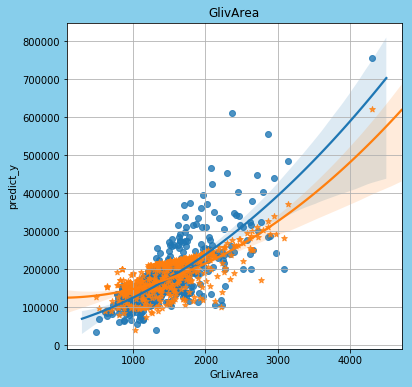

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

predict_y = pd.DataFrame(hx_cubed)
test_X = pd.DataFrame(X_test)
test_y = pd.DataFrame(y_test)

plot_predict = pd.DataFrame(pd.concat([test_X, test_y, predict_y], axis=1).values)
plot_predict = plot_predict.rename(columns={0:'GrLivArea', 1:'YearBuilt', 2:'test_y', 3:'predict_y'})

# define Initial setting 
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)

plt.grid()

# plot a cross section of mt.Fuji
plt.title("GlivArea")
# plt.xlabel("GrLivArea")
# plt.ylabel("loss")

sns.regplot('GrLivArea', 'test_y', data=plot_predict, order=2, label='Test', marker='o')
sns.regplot('GrLivArea', 'predict_y', data=plot_predict, order=2, label='Predict', marker='*')

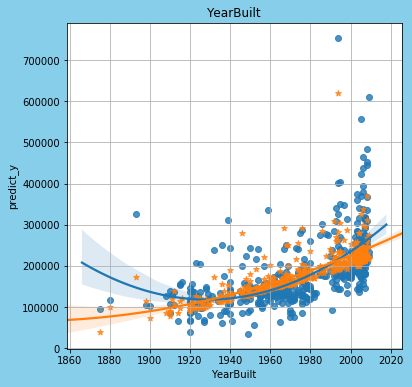

In [20]:
# define Initial setting 
fig, ax = plt.subplots(figsize=(6, 6))
fig.patch.set_facecolor('skyblue')
fig.patch.set_alpha(1)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1)

plt.grid()


# plot a cross section of mt.Fuji
plt.title("YearBuilt")
# plt.xlabel("YearBuilt")
# plt.ylabel("loss")


sns.regplot('YearBuilt', 'test_y', data=plot_predict, order=2, label='Test', marker='o')
sns.regplot('YearBuilt', 'predict_y', data=plot_predict, order=2, label='Predict', marker='*')

### 【問題5】（アドバンス課題）更新式の導出
最急降下法の更新式は以下でした。この式が導出される過程を説明してください。



### 【問題6】（アドバンス課題）局所最適解の問題
最急降下法には一般的に局所最適解の問題があります。しかし、線形回帰では学習を続ければ必ず最適解を求めることができます。それはなぜか数式やグラフを用いて説明してください。

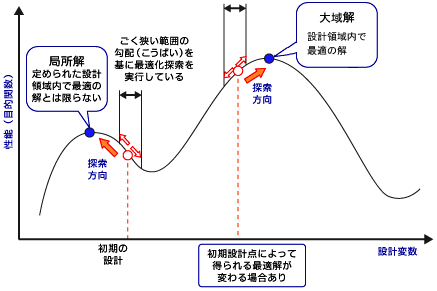

In [21]:
# plan
import os
import os.path
from IPython.display import display
from PIL import Image

path1 = "kyokusho.gif"
display(Image.open(path1))

### 【問題7】スクラッチで学べることは何か
最終発表時に以下の内容についてディスカッションを行います。自分なりの意見を用意しておいてください。
ライブラリを使うのではなくスクラッチでアルゴリズムを実装したことで学べたことは何か
注意点
感想ではなく、他人を納得させられるような内容にしてください。

<br>・標準化が必要かどうかを確認できる。
<br>・パラメータ数値の更新がどのように行われているかの可視化できる。
<br>・クラスの構造への理解ができる(インスタンス変数、イニシャル変数など)